# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kidrg/machine_learning_projects/refs/heads/main/datasets/smokers_health_data/smoking_health_data_after_clustering.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   cigs_per_day    3900 non-null   float64
 5   chol            3900 non-null   float64
 6   systolic        3900 non-null   float64
 7   diastolic       3900 non-null   float64
 8   Cluster         3900 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 274.3+ KB


,age,heart_rate,cigs_per_day,chol,systolic,diastolic,Cluster
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,49.537949,75.688974,9.135641,236.591282,132.395385,82.987179,1.285641
std,8.559275,12.015376,12.028875,44.335649,21.976335,11.918623,1.127633
min,32.000000,44.000000,0.000000,113.000000,83.500000,48.000000,0.000000
25%,42.000000,68.000000,0.000000,206.000000,117.000000,75.000000,0.000000
50%,49.000000,75.000000,0.000000,234.000000,128.000000,82.000000,1.000000
75%,56.000000,82.000000,20.000000,263.000000,144.000000,90.000000,2.000000
max,70.000000,143.000000,70.000000,696.000000,295.000000,142.500000,3.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76       265
           1       0.72      0.71      0.72       221
           2       0.56      0.33      0.41       151
           3       0.58      0.57      0.58       143

    accuracy                           0.66       780
   macro avg       0.63      0.62      0.62       780
weighted avg       0.65      0.66      0.65       780


Feature Importance:
        Feature  Importance
2  cigs_per_day    0.845721
0           age    0.035024
5     diastolic    0.030060
3          chol    0.029905
1    heart_rate    0.029869
4      systolic    0.029421

Sample Patient: {'age': 40.0, 'heart_rate': 96.0, 'cigs_per_day': 0.0, 'chol': 193.0, 'systolic': 130.0, 'diastolic': 89.0}
Predicted Cluster: 0
Prediction Probabilities: [0.84231037 0.00291016 0.15383175 0.00094771]


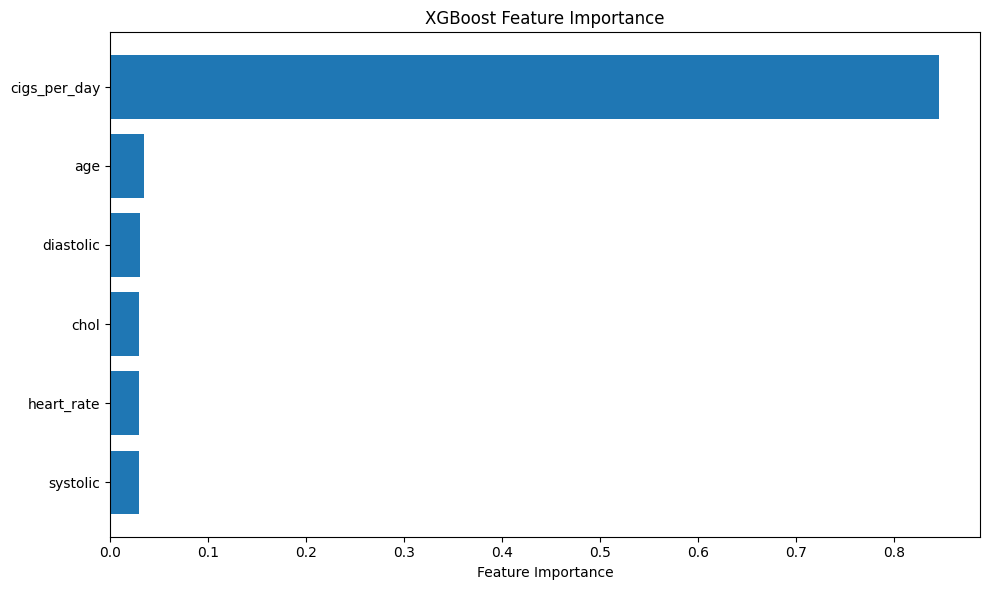

In [ ]:
# Import XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Encode categorical variables using LabelEncoder
le_sex = LabelEncoder()
le_smoker = LabelEncoder()

# Create copies to preserve original data
df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['smoker_encoded'] = le_smoker.fit_transform(df['current_smoker'])

# Features and target variable
X = df[['age', 'heart_rate', 'cigs_per_day', 'chol', 'systolic', 'diastolic']]
y = df['Cluster']  # The cluster column is your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'  # For multi-class classification
)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Sample prediction
sample = X_test.iloc[0:1]  # Keep as DataFrame to match model input format
prediction = xgb_classifier.predict(sample)

# Retrieve and display the sample
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Patient: {sample_dict}")
print(f"Predicted Cluster: {prediction[0]}")

# Optional: Get prediction probabilities
prediction_proba = xgb_classifier.predict_proba(sample)
print(f"Prediction Probabilities: {prediction_proba[0]}")

# Optional: Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,sex,current_smoker,heart_rate,cigs_per_day,chol,systolic,diastolic,Cluster,sex_encoded,smoker_encoded
0,54,male,yes,95,0.0,219.0,110.0,72.0,1,1,1
1,45,male,yes,64,0.0,248.0,121.0,72.0,1,1,1
2,58,male,yes,81,0.0,235.0,127.5,76.0,1,1,1
3,42,male,yes,90,0.0,225.0,122.5,80.0,1,1,1
4,42,male,yes,62,0.0,226.0,119.0,80.0,1,1,1


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
#Type your code here

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.